In [521]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

In [522]:
import pandas as pd
from datetime import datetime, timedelta

weather_df = pd.read_csv('data\Weather.csv') # dacon에서 날씨 데이터 가져오기
weather_df2 = pd.read_csv('Weather2.csv') # 6월 이후 날씨 데이터

confirmed_df = pd.read_csv('data\TimeProvince.csv') # 날짜별 지역별 확진자 데이터

In [523]:
weather_df = weather_df.loc[:, ['date', 'province', 'avg_relative_humidity']] # 날짜, 지역, 평균상대습도만
weather_2020 = weather_df['date'].str.contains("2020") # 데이터가 2016년부터여서 2020년꺼만 가져오기
weather_df = weather_df[weather_2020]

weather_df2 = weather_df2.loc[:, ['date', 'province', 'avg_relative_humidity']]

In [524]:
confirmed_df = confirmed_df.loc[:, ['date', 'province', 'confirmed']] # 날짜, 지역, 확진자 수

In [525]:
# 서울 확진자 수
seoul_confirmed = confirmed_df[['date', 'confirmed']][confirmed_df['province'] == 'Seoul'] # 서울 지역 확진자
seoul_confirmed = seoul_confirmed.reset_index(drop=True) # 서울인 것만 빼온거여서 인덱스 새로 부여 / drop=True 는 원래 인덱스 버리기

for i in range(len(seoul_confirmed)-1, 1, -1):
    seoul_confirmed['confirmed'][i] = seoul_confirmed['confirmed'][i] - seoul_confirmed['confirmed'][i-1] # 누적 확진자 수여서 오늘에서 어제꺼 빼면 오늘 확진자 수
    
seoul_confirmed['date'] = pd.to_datetime(seoul_confirmed['date']) # 날짜 데이터의 타입을 날짜로 바꿔줌 (원래 object)

In [526]:
# 서울 습도
seoul_humidity = weather_df[['date', 'avg_relative_humidity']][weather_df['province'] == 'Seoul']
seoul_humidity = seoul_humidity.reset_index(drop=True)

seoul_humidity2 = weather_df2[['date', 'avg_relative_humidity']][weather_df2['province'] == 'Seoul']
seoul_humidity2 = seoul_humidity2.reset_index(drop=True)

seoul_humidity['date'] = pd.to_datetime(seoul_humidity['date'])
seoul_humidity2['date'] = pd.to_datetime(seoul_humidity2['date'])

seoul_humidity = pd.concat([seoul_humidity, seoul_humidity2]) # 습도 데이터 두개 이어 붙이기
seoul_humidity = seoul_humidity.reset_index(drop=True)
seoul_humidity['date'] = seoul_humidity['date'] + pd.DateOffset(days = 5) # 5일씩 더해주는 과정
seoul_humidity = seoul_humidity.drop(seoul_humidity.index[0:14])
seoul_humidity = seoul_humidity.reset_index(drop=True)
seoul_humidity = seoul_humidity.drop(seoul_humidity.index[-1:-6:-1])

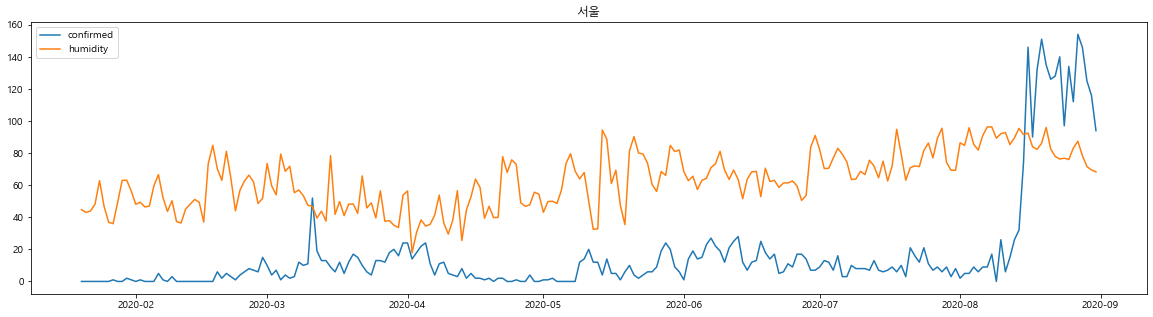

In [527]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.figure(figsize=(20, 5))
plt.plot(seoul_confirmed['date'], seoul_confirmed['confirmed'], label='confirmed')
plt.plot(seoul_humidity['date'], seoul_humidity['avg_relative_humidity'], label = 'humidity')
plt.title("서울")
plt.legend()
plt.show()

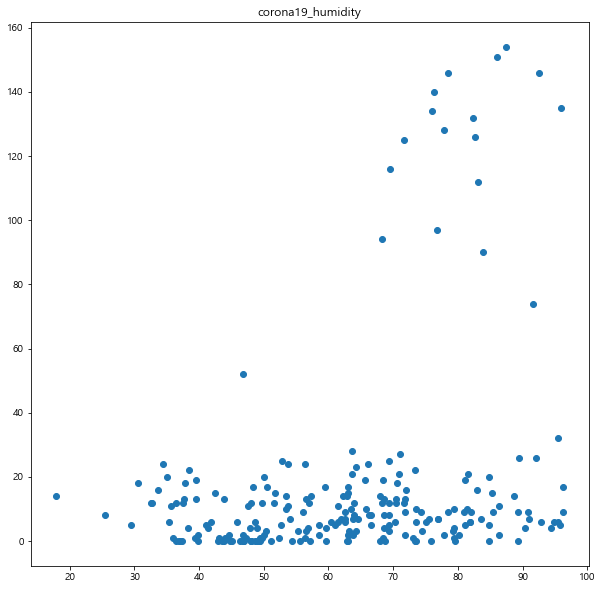

In [528]:
plt.figure(figsize=(10, 10))
plt.scatter(seoul_humidity['avg_relative_humidity'], seoul_confirmed['confirmed'])
plt.title('corona19_humidity')
plt.show()

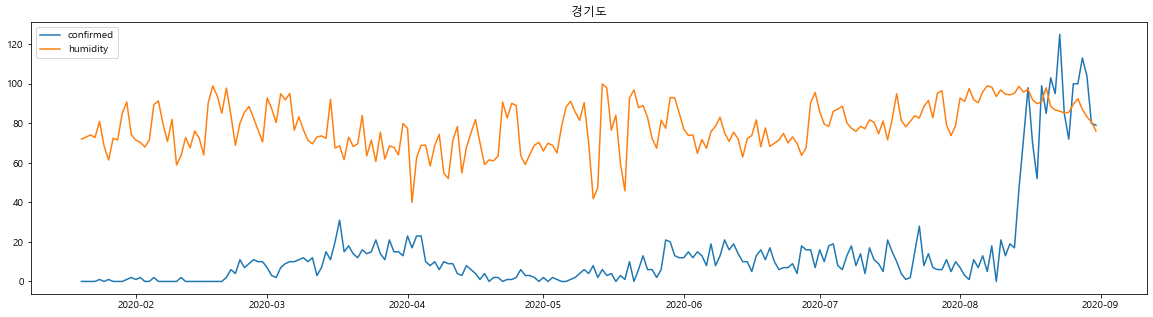

In [529]:
# 경기도 확진자 수
confirmed = confirmed_df[['date', 'confirmed']][confirmed_df['province'] == 'Gyeonggi-do']
confirmed = confirmed.reset_index(drop=True) 

for i in range(len(confirmed)-1, 1, -1):
    confirmed['confirmed'][i] = confirmed['confirmed'][i] - confirmed['confirmed'][i-1]
    
confirmed['date'] = pd.to_datetime(confirmed['date'])

# 경기도 습도
humidity = weather_df[['date', 'avg_relative_humidity']][weather_df['province'] == 'Gyeonggi-do']
humidity = humidity.reset_index(drop=True)

humidity2 = weather_df2[['date', 'avg_relative_humidity']][weather_df2['province'] == 'Gyeonggi-do']
humidity2 = humidity2.reset_index(drop=True)

humidity['date'] = pd.to_datetime(humidity['date'])
humidity2['date'] = pd.to_datetime(humidity2['date'])

humidity = pd.concat([humidity, humidity2]) # 습도 데이터 두개 이어 붙이기
humidity = humidity.reset_index(drop=True)
humidity['date'] = humidity['date'] + pd.DateOffset(days = 5) # 5일씩 더해주는 과정
humidity = humidity.drop(humidity.index[0:14])
humidity = humidity.reset_index(drop=True)
humidity = humidity.drop(humidity.index[-1:-6:-1])

plt.figure(figsize=(20, 5))
plt.plot(confirmed['date'], confirmed['confirmed'], label='confirmed')
plt.plot(humidity['date'], humidity['avg_relative_humidity'], label = 'humidity')
plt.title("경기도")
plt.legend()
plt.show()

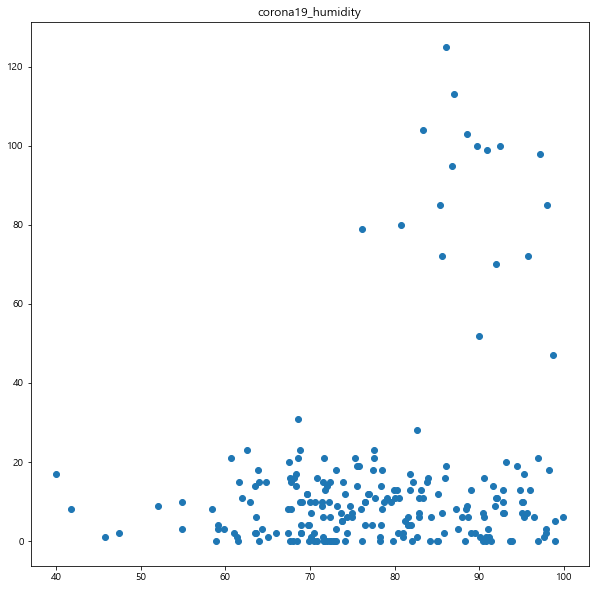

In [530]:
plt.figure(figsize=(10, 10))
plt.scatter(humidity['avg_relative_humidity'], confirmed['confirmed'])
plt.title('corona19_humidity')
plt.show()

In [531]:
# 부산 확진자 수
busan_confirmed = confirmed_df[['date', 'confirmed']][confirmed_df['province'] == 'Busan']
busan_confirmed = busan_confirmed.reset_index(drop=True) 

for i in range(len(busan_confirmed)-1, 1, -1):
    busan_confirmed['confirmed'][i] = busan_confirmed['confirmed'][i] - busan_confirmed['confirmed'][i-1]
    
busan_confirmed['date'] = pd.to_datetime(busan_confirmed['date'])

In [532]:
# 부산 습도
busan_humidity = weather_df[['date', 'avg_relative_humidity']][weather_df['province'] == 'Busan']
busan_humidity = busan_humidity.reset_index(drop=True)

busan_humidity2 = weather_df2[['date', 'avg_relative_humidity']][weather_df2['province'] == 'Busan']
busan_humidity2 = busan_humidity2.reset_index(drop=True)

busan_humidity['date'] = pd.to_datetime(busan_humidity['date'])
busan_humidity2['date'] = pd.to_datetime(busan_humidity2['date'])

busan_humidity = pd.concat([busan_humidity, busan_humidity2]) # 습도 데이터 두개 이어 붙이기
busan_humidity = busan_humidity.reset_index(drop=True)
busan_humidity['date'] = busan_humidity['date'] + pd.DateOffset(days = 5) # 5일씩 더해주는 과정
busan_humidity = busan_humidity.drop(busan_humidity.index[0:14])
busan_humidity = busan_humidity.reset_index(drop=True)
busan_humidity = busan_humidity.drop(busan_humidity.index[-1:-6:-1])

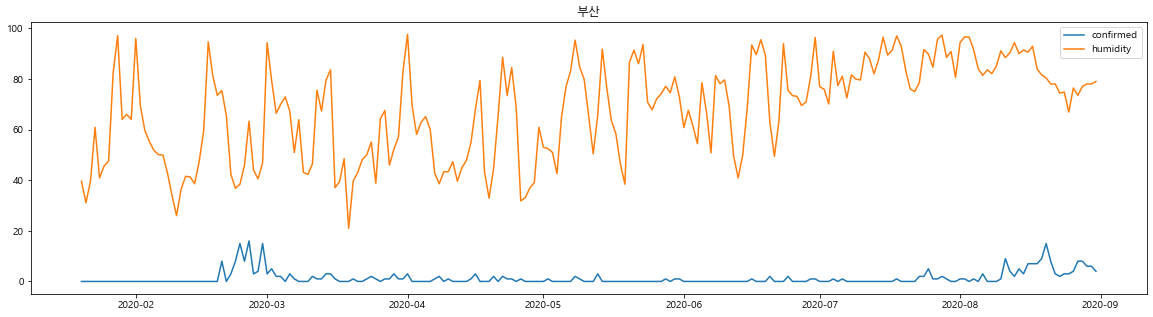

In [533]:
plt.figure(figsize=(20, 5))
plt.plot(busan_confirmed['date'], busan_confirmed['confirmed'], label='confirmed')
plt.plot(busan_humidity['date'], busan_humidity['avg_relative_humidity'], label = 'humidity')
plt.title("부산")
plt.legend()
plt.show()

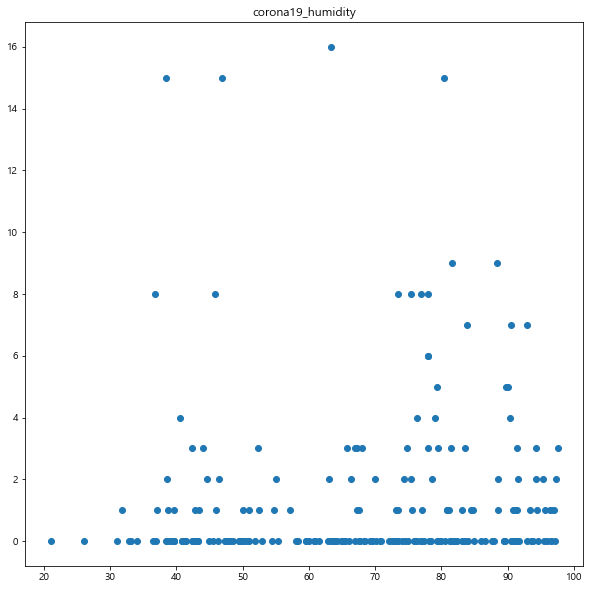

In [534]:
plt.figure(figsize=(10, 10))
plt.scatter(busan_humidity['avg_relative_humidity'], busan_confirmed['confirmed'])
plt.title('corona19_humidity')
plt.show()

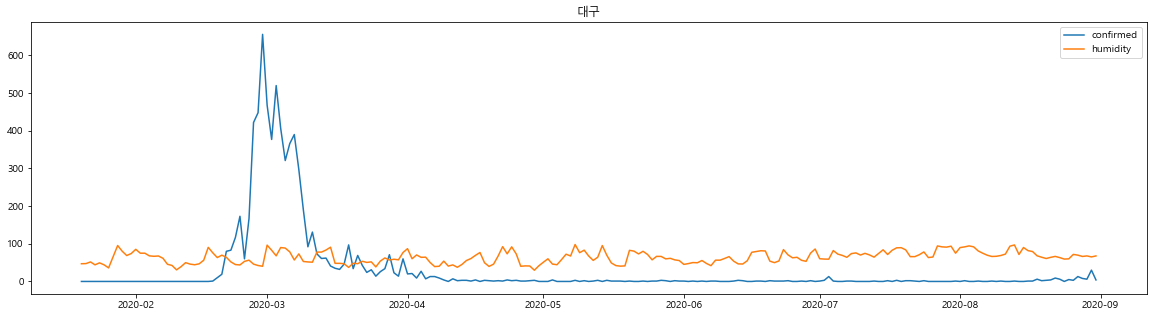

In [535]:
# 대구 확진자 수
confirmed = confirmed_df[['date', 'confirmed']][confirmed_df['province'] == 'Daegu']
confirmed = confirmed.reset_index(drop=True) 

for i in range(len(confirmed)-1, 1, -1):
    confirmed['confirmed'][i] = confirmed['confirmed'][i] - confirmed['confirmed'][i-1]
    
confirmed['date'] = pd.to_datetime(confirmed['date'])

# 대구 습도
humidity = weather_df[['date', 'avg_relative_humidity']][weather_df['province'] == 'Daegu']
humidity = humidity.reset_index(drop=True)

humidity2 = weather_df2[['date', 'avg_relative_humidity']][weather_df2['province'] == 'Daegu']
humidity2 = humidity2.reset_index(drop=True)

humidity['date'] = pd.to_datetime(humidity['date'])
humidity2['date'] = pd.to_datetime(humidity2['date'])

humidity = pd.concat([humidity, humidity2]) # 습도 데이터 두개 이어 붙이기
humidity = humidity.reset_index(drop=True)
humidity['date'] = humidity['date'] + pd.DateOffset(days = 5) # 5일씩 더해주는 과정
humidity = humidity.drop(humidity.index[0:14])
humidity = humidity.reset_index(drop=True)
humidity = humidity.drop(humidity.index[-1:-6:-1])

plt.figure(figsize=(20, 5))
plt.plot(confirmed['date'], confirmed['confirmed'], label='confirmed')
plt.plot(humidity['date'], humidity['avg_relative_humidity'], label = 'humidity')
plt.title("대구")
plt.legend()
plt.show()

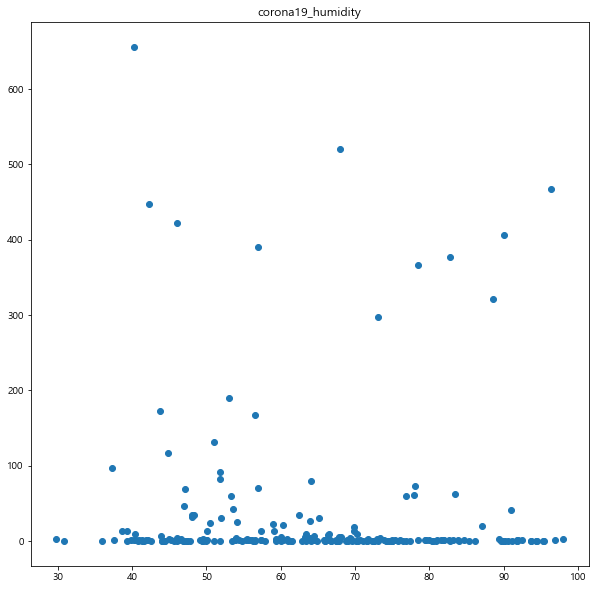

In [536]:
plt.figure(figsize=(10, 10))
plt.scatter(humidity['avg_relative_humidity'], confirmed['confirmed'])
plt.title('corona19_humidity')
plt.show()

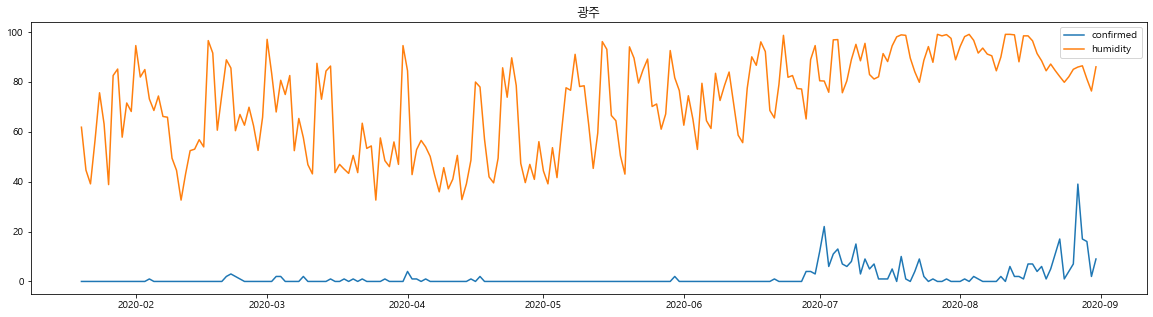

In [537]:
# 광주 확진자 수
confirmed = confirmed_df[['date', 'confirmed']][confirmed_df['province'] == 'Gwangju']
confirmed = confirmed.reset_index(drop=True) 

for i in range(len(confirmed)-1, 1, -1):
    confirmed['confirmed'][i] = confirmed['confirmed'][i] - confirmed['confirmed'][i-1]
    
confirmed['date'] = pd.to_datetime(confirmed['date'])

# 광주 습도
humidity = weather_df[['date', 'avg_relative_humidity']][weather_df['province'] == 'Gwangju']
humidity = humidity.reset_index(drop=True)

humidity2 = weather_df2[['date', 'avg_relative_humidity']][weather_df2['province'] == 'Gwangju']
humidity2 = humidity2.reset_index(drop=True)

humidity['date'] = pd.to_datetime(humidity['date'])
humidity2['date'] = pd.to_datetime(humidity2['date'])

humidity = pd.concat([humidity, humidity2]) # 습도 데이터 두개 이어 붙이기
humidity = humidity.reset_index(drop=True)
humidity['date'] = humidity['date'] + pd.DateOffset(days = 5) # 5일씩 더해주는 과정
humidity = humidity.drop(humidity.index[0:14])
humidity = humidity.reset_index(drop=True)
humidity = humidity.drop(humidity.index[-1:-6:-1])

plt.figure(figsize=(20, 5))
plt.plot(confirmed['date'], confirmed['confirmed'], label='confirmed')
plt.plot(humidity['date'], humidity['avg_relative_humidity'], label = 'humidity')
plt.title("광주")
plt.legend()
plt.show()

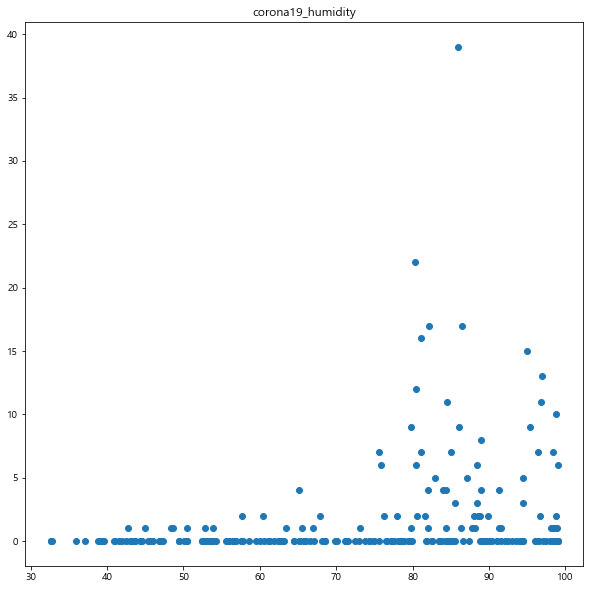

In [538]:
plt.figure(figsize=(10, 10))
plt.scatter(humidity['avg_relative_humidity'], confirmed['confirmed'])
plt.title('corona19_humidity')
plt.show()

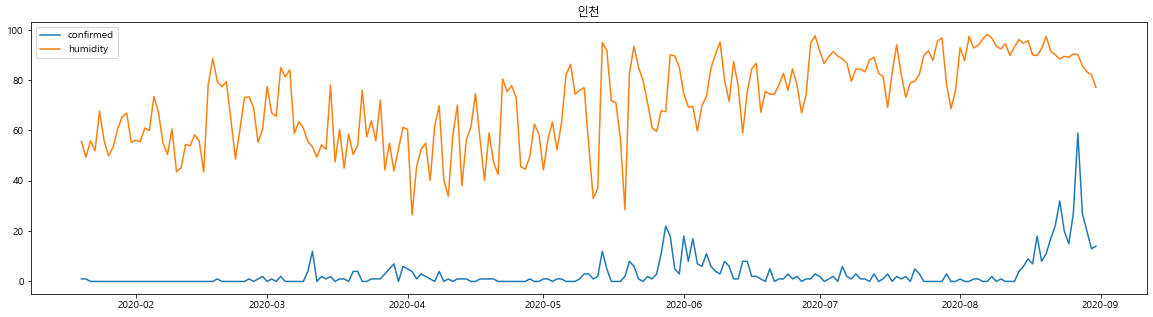

In [539]:
# 인천 확진자 수
confirmed = confirmed_df[['date', 'confirmed']][confirmed_df['province'] == 'Incheon']
confirmed = confirmed.reset_index(drop=True) 

for i in range(len(confirmed)-1, 1, -1):
    confirmed['confirmed'][i] = confirmed['confirmed'][i] - confirmed['confirmed'][i-1]
    
confirmed['date'] = pd.to_datetime(confirmed['date'])

# 인천 습도
humidity = weather_df[['date', 'avg_relative_humidity']][weather_df['province'] == 'Incheon']
humidity = humidity.reset_index(drop=True)

humidity2 = weather_df2[['date', 'avg_relative_humidity']][weather_df2['province'] == 'Incheon']
humidity2 = humidity2.reset_index(drop=True)

humidity['date'] = pd.to_datetime(humidity['date'])
humidity2['date'] = pd.to_datetime(humidity2['date'])

humidity = pd.concat([humidity, humidity2]) # 습도 데이터 두개 이어 붙이기
humidity = humidity.reset_index(drop=True)
humidity['date'] = humidity['date'] + pd.DateOffset(days = 5) # 5일씩 더해주는 과정
humidity = humidity.drop(humidity.index[0:14])
humidity = humidity.reset_index(drop=True)
humidity = humidity.drop(humidity.index[-1:-6:-1])

plt.figure(figsize=(20, 5))
plt.plot(confirmed['date'], confirmed['confirmed'], label='confirmed')
plt.plot(humidity['date'], humidity['avg_relative_humidity'], label = 'humidity')
plt.title("인천")
plt.legend()
plt.show()

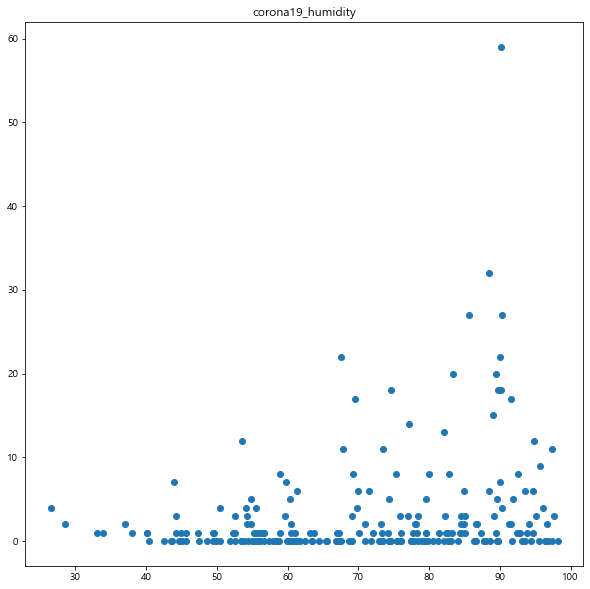

In [540]:
plt.figure(figsize=(10, 10))
plt.scatter(humidity['avg_relative_humidity'], confirmed['confirmed'])
plt.title('corona19_humidity')
plt.show()

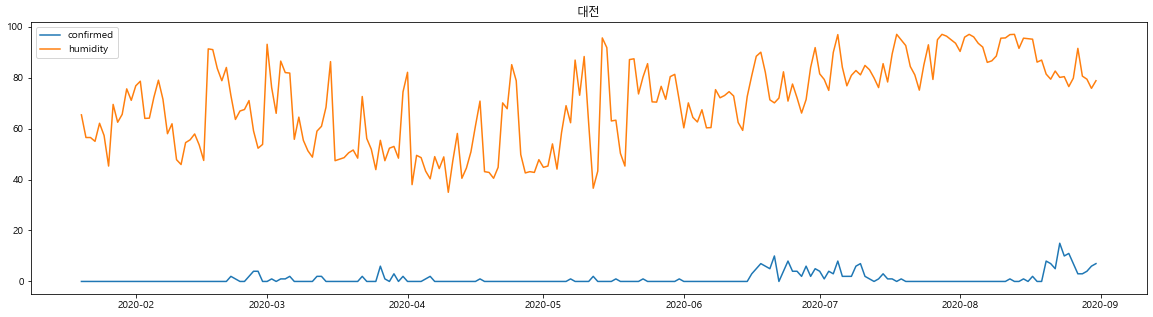

In [541]:
# 대전 확진자 수
confirmed = confirmed_df[['date', 'confirmed']][confirmed_df['province'] == 'Daejeon']
confirmed = confirmed.reset_index(drop=True) 

for i in range(len(confirmed)-1, 1, -1):
    confirmed['confirmed'][i] = confirmed['confirmed'][i] - confirmed['confirmed'][i-1]
    
confirmed['date'] = pd.to_datetime(confirmed['date'])

# 대전 습도
humidity = weather_df[['date', 'avg_relative_humidity']][weather_df['province'] == 'Daejeon']
humidity = humidity.reset_index(drop=True)

humidity2 = weather_df2[['date', 'avg_relative_humidity']][weather_df2['province'] == 'Daejeon']
humidity2 = humidity2.reset_index(drop=True)

humidity['date'] = pd.to_datetime(humidity['date'])
humidity2['date'] = pd.to_datetime(humidity2['date'])

humidity = pd.concat([humidity, humidity2]) # 습도 데이터 두개 이어 붙이기
humidity = humidity.reset_index(drop=True)
humidity['date'] = humidity['date'] + pd.DateOffset(days = 5) # 5일씩 더해주는 과정
humidity = humidity.drop(humidity.index[0:14])
humidity = humidity.reset_index(drop=True)
humidity = humidity.drop(humidity.index[-1:-6:-1])

plt.figure(figsize=(20, 5))
plt.plot(confirmed['date'], confirmed['confirmed'], label='confirmed')
plt.plot(humidity['date'], humidity['avg_relative_humidity'], label = 'humidity')
plt.title("대전")
plt.legend()
plt.show()

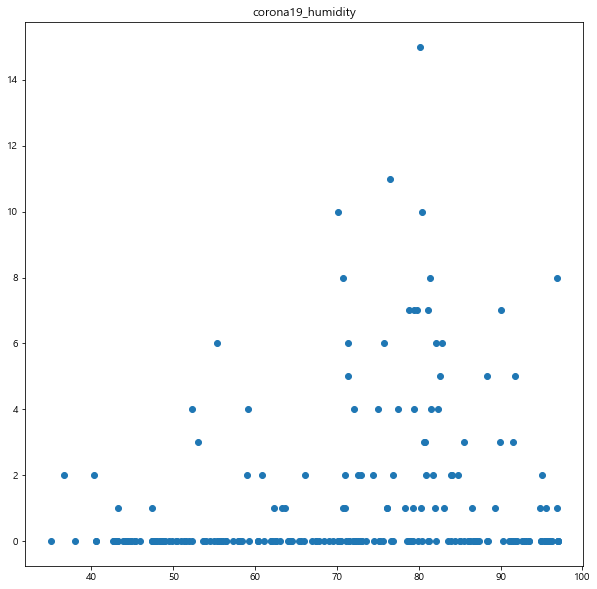

In [542]:
plt.figure(figsize=(10, 10))
plt.scatter(humidity['avg_relative_humidity'], confirmed['confirmed'])
plt.title('corona19_humidity')
plt.show()

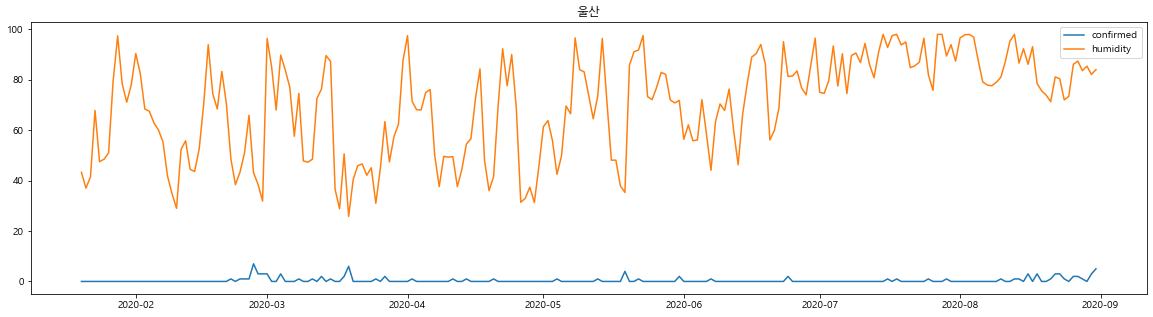

In [543]:
# 울산 확진자 수
confirmed = confirmed_df[['date', 'confirmed']][confirmed_df['province'] == 'Ulsan']
confirmed = confirmed.reset_index(drop=True) 

for i in range(len(confirmed)-1, 1, -1):
    confirmed['confirmed'][i] = confirmed['confirmed'][i] - confirmed['confirmed'][i-1]
    
confirmed['date'] = pd.to_datetime(confirmed['date'])

# 울산 습도
humidity = weather_df[['date', 'avg_relative_humidity']][weather_df['province'] == 'Ulsan']
humidity = humidity.reset_index(drop=True)

humidity2 = weather_df2[['date', 'avg_relative_humidity']][weather_df2['province'] == 'Ulsan']
humidity2 = humidity2.reset_index(drop=True)

humidity['date'] = pd.to_datetime(humidity['date'])
humidity2['date'] = pd.to_datetime(humidity2['date'])

humidity = pd.concat([humidity, humidity2]) # 습도 데이터 두개 이어 붙이기
humidity = humidity.reset_index(drop=True)
humidity['date'] = humidity['date'] + pd.DateOffset(days = 5) # 5일씩 더해주는 과정
humidity = humidity.drop(humidity.index[0:14])
humidity = humidity.reset_index(drop=True)
humidity = humidity.drop(humidity.index[-1:-6:-1])

plt.figure(figsize=(20, 5))
plt.plot(confirmed['date'], confirmed['confirmed'], label='confirmed')
plt.plot(humidity['date'], humidity['avg_relative_humidity'], label = 'humidity')
plt.title("울산")
plt.legend()
plt.show()

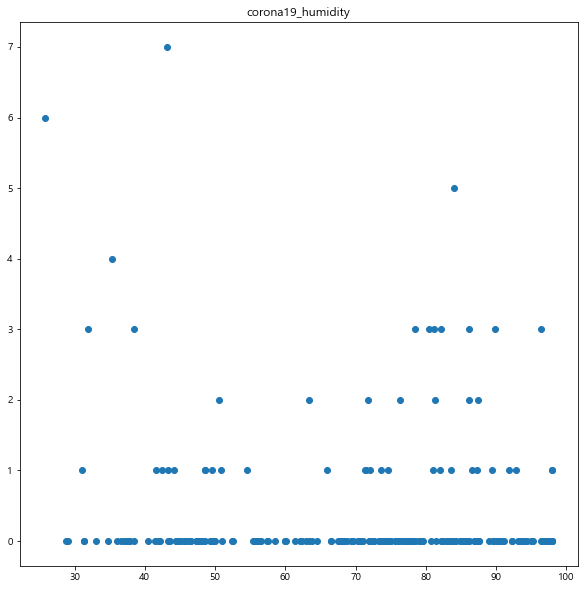

In [544]:
plt.figure(figsize=(10, 10))
plt.scatter(humidity['avg_relative_humidity'], confirmed['confirmed'])
plt.title('corona19_humidity')
plt.show()

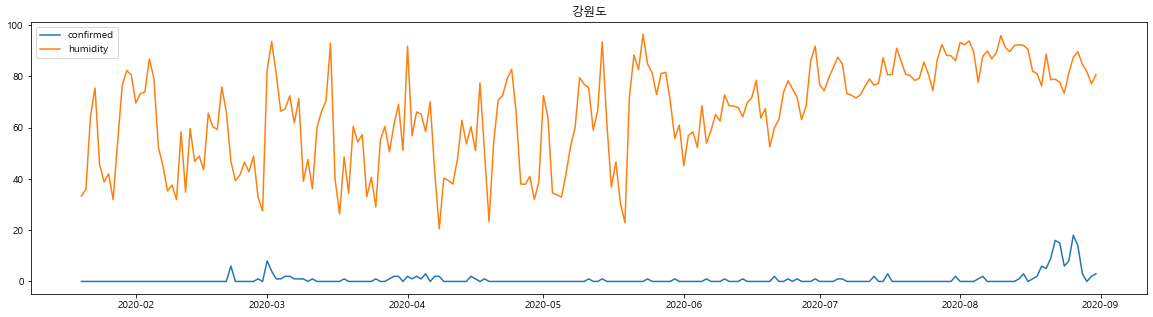

In [545]:
# 강원도 확진자 수
confirmed = confirmed_df[['date', 'confirmed']][confirmed_df['province'] == 'Gangwon-do']
confirmed = confirmed.reset_index(drop=True) 

for i in range(len(confirmed)-1, 1, -1):
    confirmed['confirmed'][i] = confirmed['confirmed'][i] - confirmed['confirmed'][i-1]
    
confirmed['date'] = pd.to_datetime(confirmed['date'])

# 강원도 습도
humidity = weather_df[['date', 'avg_relative_humidity']][weather_df['province'] == 'Gangwon-do']
humidity = humidity.reset_index(drop=True)

humidity2 = weather_df2[['date', 'avg_relative_humidity']][weather_df2['province'] == 'Gangwon-do']
humidity2 = humidity2.reset_index(drop=True)

humidity['date'] = pd.to_datetime(humidity['date'])
humidity2['date'] = pd.to_datetime(humidity2['date'])

humidity = pd.concat([humidity, humidity2]) # 습도 데이터 두개 이어 붙이기
humidity = humidity.reset_index(drop=True)
humidity['date'] = humidity['date'] + pd.DateOffset(days = 5) # 5일씩 더해주는 과정
humidity = humidity.drop(humidity.index[0:14])
humidity = humidity.reset_index(drop=True)
humidity = humidity.drop(humidity.index[-1:-6:-1])

plt.figure(figsize=(20, 5))
plt.plot(confirmed['date'], confirmed['confirmed'], label='confirmed')
plt.plot(humidity['date'], humidity['avg_relative_humidity'], label = 'humidity')
plt.title("강원도")
plt.legend()
plt.show()

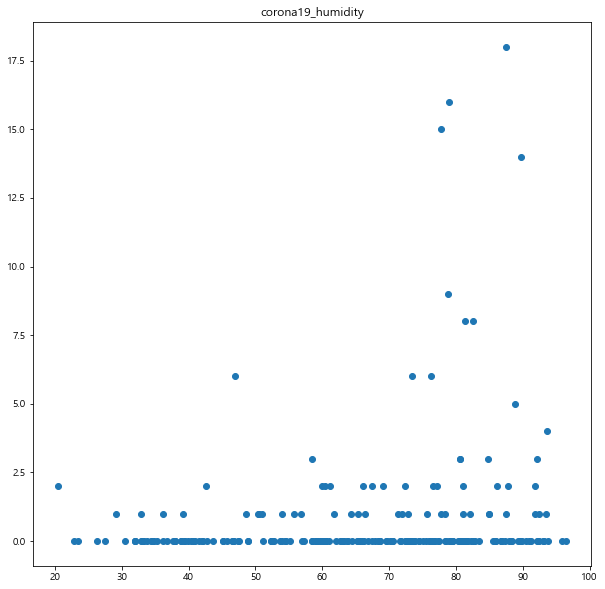

In [546]:
plt.figure(figsize=(10, 10))
plt.scatter(humidity['avg_relative_humidity'], confirmed['confirmed'])
plt.title('corona19_humidity')
plt.show()

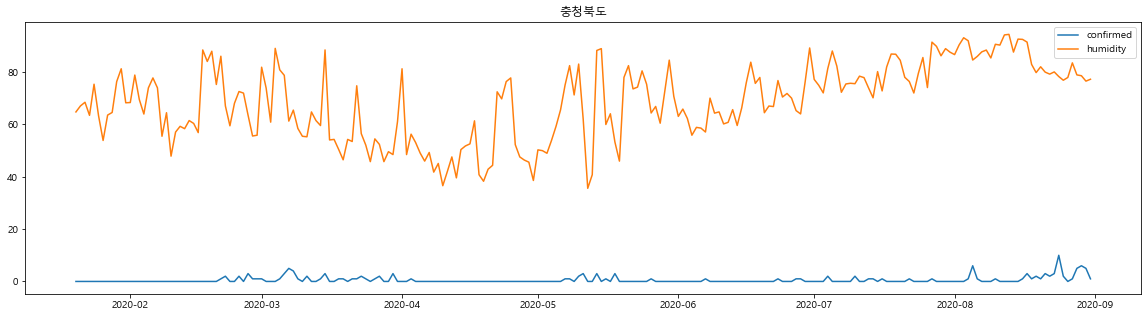

In [547]:
# 충청북도 확진자 수
confirmed = confirmed_df[['date', 'confirmed']][confirmed_df['province'] == 'Chungcheongbuk-do']
confirmed = confirmed.reset_index(drop=True) 

for i in range(len(confirmed)-1, 1, -1):
    confirmed['confirmed'][i] = confirmed['confirmed'][i] - confirmed['confirmed'][i-1]
    
confirmed['date'] = pd.to_datetime(confirmed['date'])

# 충청북도 습도
humidity = weather_df[['date', 'avg_relative_humidity']][weather_df['province'] == 'Chungcheongbuk-do']
humidity = humidity.reset_index(drop=True)

humidity2 = weather_df2[['date', 'avg_relative_humidity']][weather_df2['province'] == 'Chungcheongbuk-do']
humidity2 = humidity2.reset_index(drop=True)

humidity['date'] = pd.to_datetime(humidity['date'])
humidity2['date'] = pd.to_datetime(humidity2['date'])

humidity = pd.concat([humidity, humidity2]) # 습도 데이터 두개 이어 붙이기
humidity = humidity.reset_index(drop=True)
humidity['date'] = humidity['date'] + pd.DateOffset(days = 5) # 5일씩 더해주는 과정
humidity = humidity.drop(humidity.index[0:14])
humidity = humidity.reset_index(drop=True)
humidity = humidity.drop(humidity.index[-1:-6:-1])

plt.figure(figsize=(20, 5))
plt.plot(confirmed['date'], confirmed['confirmed'], label='confirmed')
plt.plot(humidity['date'], humidity['avg_relative_humidity'], label = 'humidity')
plt.title("충청북도")
plt.legend()
plt.show()

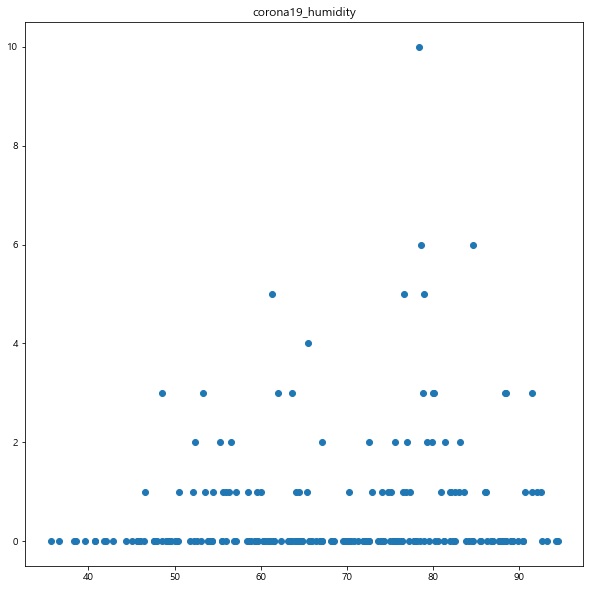

In [548]:
plt.figure(figsize=(10, 10))
plt.scatter(humidity['avg_relative_humidity'], confirmed['confirmed'])
plt.title('corona19_humidity')
plt.show()

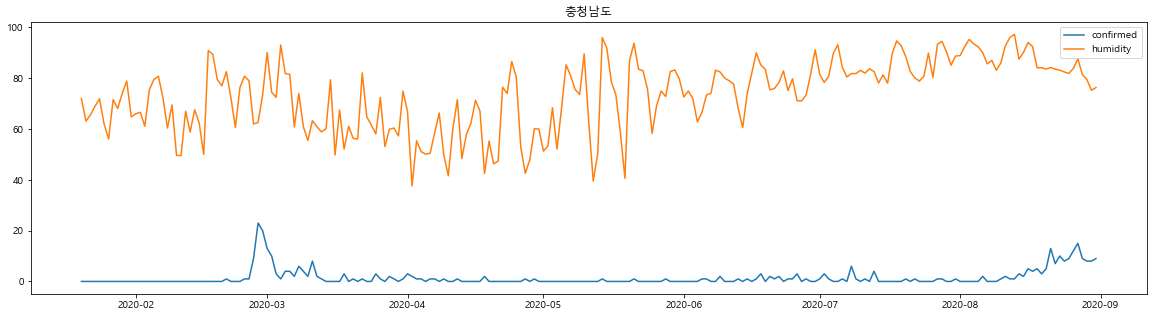

In [549]:
# 충청남도 확진자 수
confirmed = confirmed_df[['date', 'confirmed']][confirmed_df['province'] == 'Chungcheongnam-do']
confirmed = confirmed.reset_index(drop=True) 

for i in range(len(confirmed)-1, 1, -1):
    confirmed['confirmed'][i] = confirmed['confirmed'][i] - confirmed['confirmed'][i-1]
    
confirmed['date'] = pd.to_datetime(confirmed['date'])

# 충청남도 습도
humidity = weather_df[['date', 'avg_relative_humidity']][weather_df['province'] == 'Chungcheongnam-do']
humidity = humidity.reset_index(drop=True)

humidity2 = weather_df2[['date', 'avg_relative_humidity']][weather_df2['province'] == 'Chungcheongnam-do']
humidity2 = humidity2.reset_index(drop=True)

humidity['date'] = pd.to_datetime(humidity['date'])
humidity2['date'] = pd.to_datetime(humidity2['date'])

humidity = pd.concat([humidity, humidity2]) # 습도 데이터 두개 이어 붙이기
humidity = humidity.reset_index(drop=True)
humidity['date'] = humidity['date'] + pd.DateOffset(days = 5) # 5일씩 더해주는 과정
humidity = humidity.drop(humidity.index[0:14])
humidity = humidity.reset_index(drop=True)
humidity = humidity.drop(humidity.index[-1:-6:-1])

plt.figure(figsize=(20, 5))
plt.plot(confirmed['date'], confirmed['confirmed'], label='confirmed')
plt.plot(humidity['date'], humidity['avg_relative_humidity'], label = 'humidity')
plt.title("충청남도")
plt.legend()
plt.show()

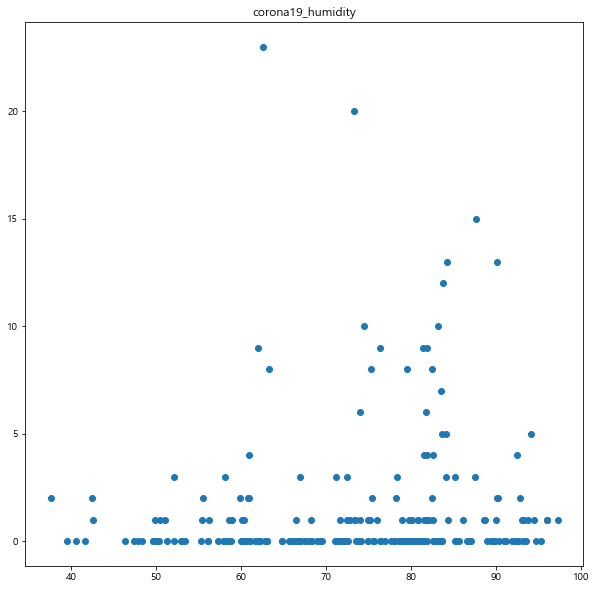

In [550]:
plt.figure(figsize=(10, 10))
plt.scatter(humidity['avg_relative_humidity'], confirmed['confirmed'])
plt.title('corona19_humidity')
plt.show()

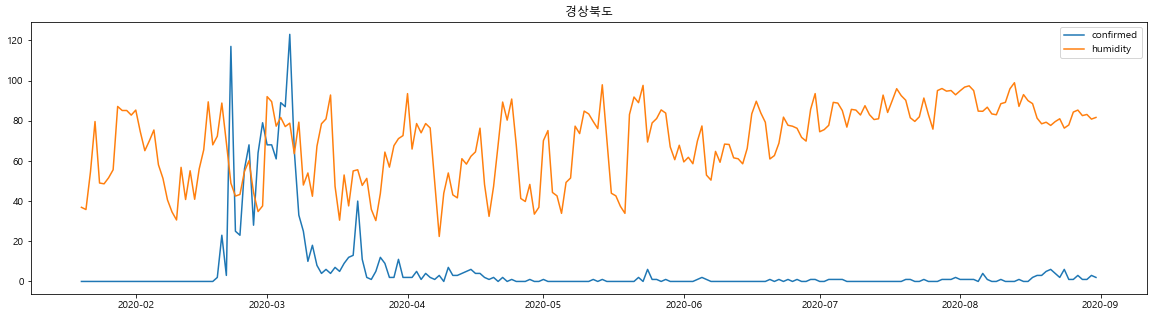

In [551]:
# 경상북도 확진자 수
confirmed = confirmed_df[['date', 'confirmed']][confirmed_df['province'] == 'Gyeongsangbuk-do']
confirmed = confirmed.reset_index(drop=True) 

for i in range(len(confirmed)-1, 1, -1):
    confirmed['confirmed'][i] = confirmed['confirmed'][i] - confirmed['confirmed'][i-1]
    
confirmed['date'] = pd.to_datetime(confirmed['date'])

# 경상북도 습도
humidity = weather_df[['date', 'avg_relative_humidity']][weather_df['province'] == 'Gyeongsangbuk-do']
humidity = humidity.reset_index(drop=True)

humidity2 = weather_df2[['date', 'avg_relative_humidity']][weather_df2['province'] == 'Gyeongsangbuk-do']
humidity2 = humidity2.reset_index(drop=True)

humidity['date'] = pd.to_datetime(humidity['date'])
humidity2['date'] = pd.to_datetime(humidity2['date'])

humidity = pd.concat([humidity, humidity2]) # 습도 데이터 두개 이어 붙이기
humidity = humidity.reset_index(drop=True)
humidity['date'] = humidity['date'] + pd.DateOffset(days = 5) # 5일씩 더해주는 과정
humidity = humidity.drop(humidity.index[0:14])
humidity = humidity.reset_index(drop=True)
humidity = humidity.drop(humidity.index[-1:-6:-1])

plt.figure(figsize=(20, 5))
plt.plot(confirmed['date'], confirmed['confirmed'], label='confirmed')
plt.plot(humidity['date'], humidity['avg_relative_humidity'], label = 'humidity')
plt.title("경상북도")
plt.legend()
plt.show()

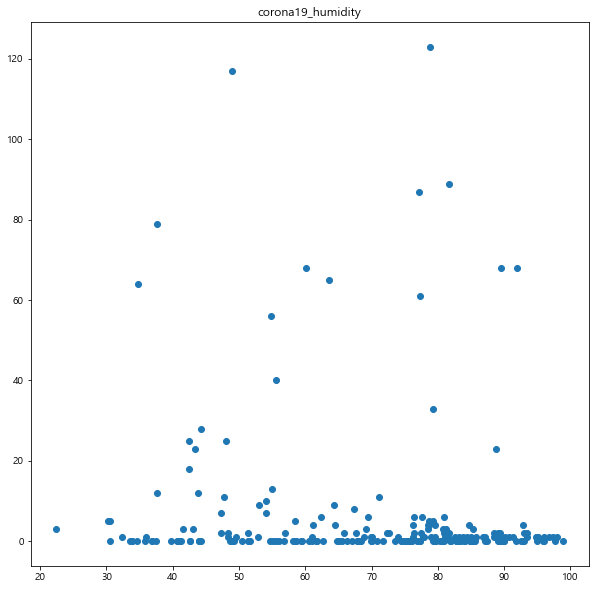

In [552]:
plt.figure(figsize=(10, 10))
plt.scatter(humidity['avg_relative_humidity'], confirmed['confirmed'])
plt.title('corona19_humidity')
plt.show()

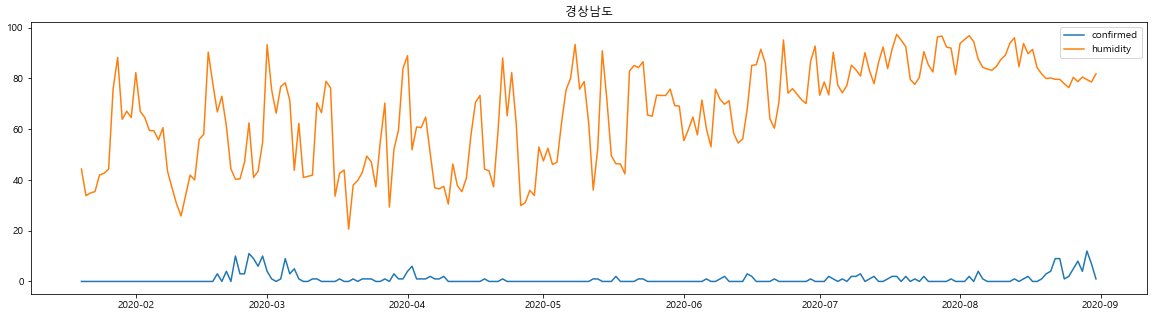

In [553]:
# 경상남도 확진자 수
confirmed = confirmed_df[['date', 'confirmed']][confirmed_df['province'] == 'Gyeongsangnam-do']
confirmed = confirmed.reset_index(drop=True) 

for i in range(len(confirmed)-1, 1, -1):
    confirmed['confirmed'][i] = confirmed['confirmed'][i] - confirmed['confirmed'][i-1]
    
confirmed['date'] = pd.to_datetime(confirmed['date'])

# 경상남도 습도
humidity = weather_df[['date', 'avg_relative_humidity']][weather_df['province'] == 'Gyeongsangnam-do']
humidity = humidity.reset_index(drop=True)

humidity2 = weather_df2[['date', 'avg_relative_humidity']][weather_df2['province'] == 'Gyeongsangnam-do']
humidity2 = humidity2.reset_index(drop=True)

humidity['date'] = pd.to_datetime(humidity['date'])
humidity2['date'] = pd.to_datetime(humidity2['date'])

humidity = pd.concat([humidity, humidity2]) # 습도 데이터 두개 이어 붙이기
humidity = humidity.reset_index(drop=True)
humidity['date'] = humidity['date'] + pd.DateOffset(days = 5) # 5일씩 더해주는 과정
humidity = humidity.drop(humidity.index[0:14])
humidity = humidity.reset_index(drop=True)
humidity = humidity.drop(humidity.index[-1:-6:-1])

plt.figure(figsize=(20, 5))
plt.plot(confirmed['date'], confirmed['confirmed'], label='confirmed')
plt.plot(humidity['date'], humidity['avg_relative_humidity'], label = 'humidity')
plt.title("경상남도")
plt.legend()
plt.show()

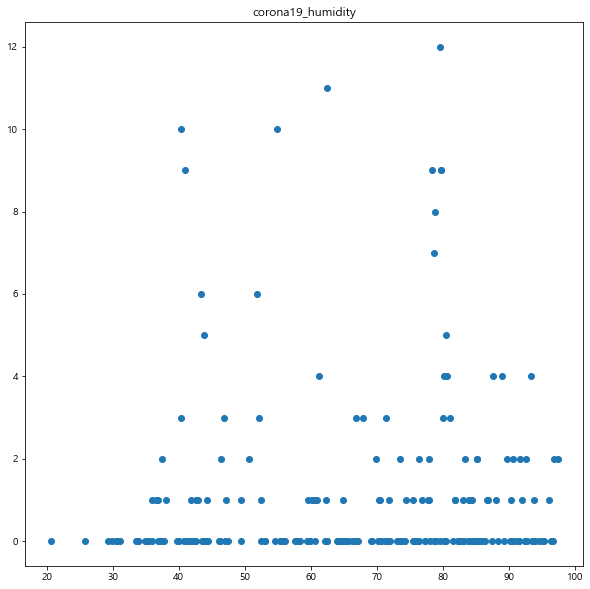

In [554]:
plt.figure(figsize=(10, 10))
plt.scatter(humidity['avg_relative_humidity'], confirmed['confirmed'])
plt.title('corona19_humidity')
plt.show()

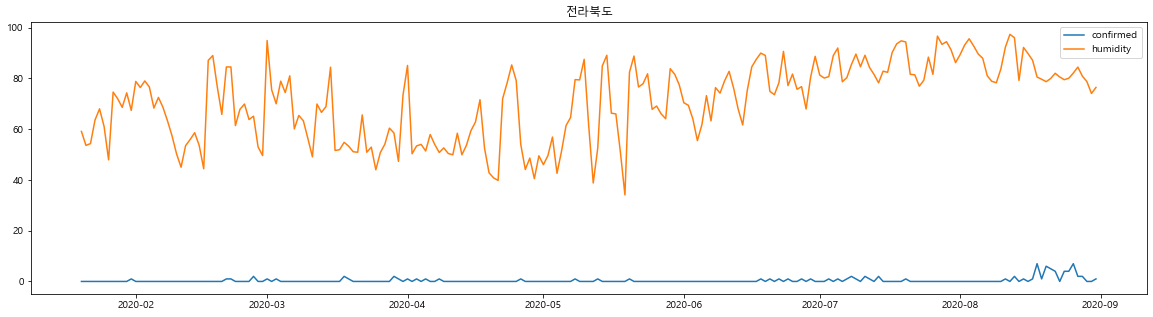

In [555]:
# 전라북도 확진자 수
confirmed = confirmed_df[['date', 'confirmed']][confirmed_df['province'] == 'Jeollabuk-do']
confirmed = confirmed.reset_index(drop=True) 

for i in range(len(confirmed)-1, 1, -1):
    confirmed['confirmed'][i] = confirmed['confirmed'][i] - confirmed['confirmed'][i-1]
    
confirmed['date'] = pd.to_datetime(confirmed['date'])

# 전라북도 습도
humidity = weather_df[['date', 'avg_relative_humidity']][weather_df['province'] == 'Jeollabuk-do']
humidity = humidity.reset_index(drop=True)

humidity2 = weather_df2[['date', 'avg_relative_humidity']][weather_df2['province'] == 'Jeollabuk-do']
humidity2 = humidity2.reset_index(drop=True)

humidity['date'] = pd.to_datetime(humidity['date'])
humidity2['date'] = pd.to_datetime(humidity2['date'])

humidity = pd.concat([humidity, humidity2]) # 습도 데이터 두개 이어 붙이기
humidity = humidity.reset_index(drop=True)
humidity['date'] = humidity['date'] + pd.DateOffset(days = 5) # 5일씩 더해주는 과정
humidity = humidity.drop(humidity.index[0:14])
humidity = humidity.reset_index(drop=True)
humidity = humidity.drop(humidity.index[-1:-6:-1])

plt.figure(figsize=(20, 5))
plt.plot(confirmed['date'], confirmed['confirmed'], label='confirmed')
plt.plot(humidity['date'], humidity['avg_relative_humidity'], label = 'humidity')
plt.title("전라북도")
plt.legend()
plt.show()

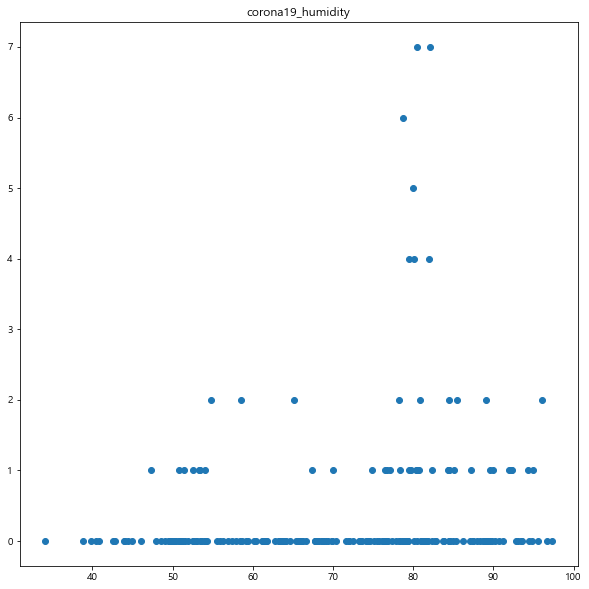

In [556]:
plt.figure(figsize=(10, 10))
plt.scatter(humidity['avg_relative_humidity'], confirmed['confirmed'])
plt.title('corona19_humidity')
plt.show()

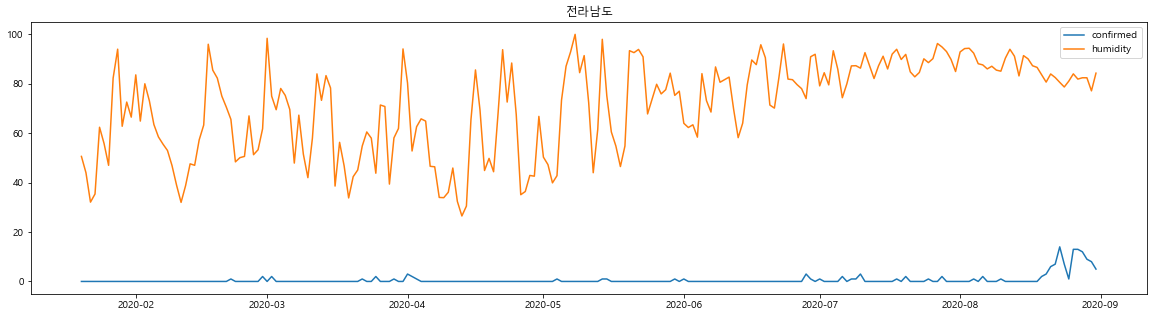

In [557]:
# 전라남도 확진자 수
confirmed = confirmed_df[['date', 'confirmed']][confirmed_df['province'] == 'Jeollanam-do']
confirmed = confirmed.reset_index(drop=True) 

for i in range(len(confirmed)-1, 1, -1):
    confirmed['confirmed'][i] = confirmed['confirmed'][i] - confirmed['confirmed'][i-1]
    
confirmed['date'] = pd.to_datetime(confirmed['date'])

# 전라남도 습도
humidity = weather_df[['date', 'avg_relative_humidity']][weather_df['province'] == 'Jeollanam-do']
humidity = humidity.reset_index(drop=True)

humidity2 = weather_df2[['date', 'avg_relative_humidity']][weather_df2['province'] == 'Jeollanam-do']
humidity2 = humidity2.reset_index(drop=True)

humidity['date'] = pd.to_datetime(humidity['date'])
humidity2['date'] = pd.to_datetime(humidity2['date'])

humidity = pd.concat([humidity, humidity2]) # 습도 데이터 두개 이어 붙이기
humidity = humidity.reset_index(drop=True)
humidity['date'] = humidity['date'] + pd.DateOffset(days = 5) # 5일씩 더해주는 과정
humidity = humidity.drop(humidity.index[0:14])
humidity = humidity.reset_index(drop=True)
humidity = humidity.drop(humidity.index[-1:-6:-1])

plt.figure(figsize=(20, 5))
plt.plot(confirmed['date'], confirmed['confirmed'], label='confirmed')
plt.plot(humidity['date'], humidity['avg_relative_humidity'], label = 'humidity')
plt.title("전라남도")
plt.legend()
plt.show()

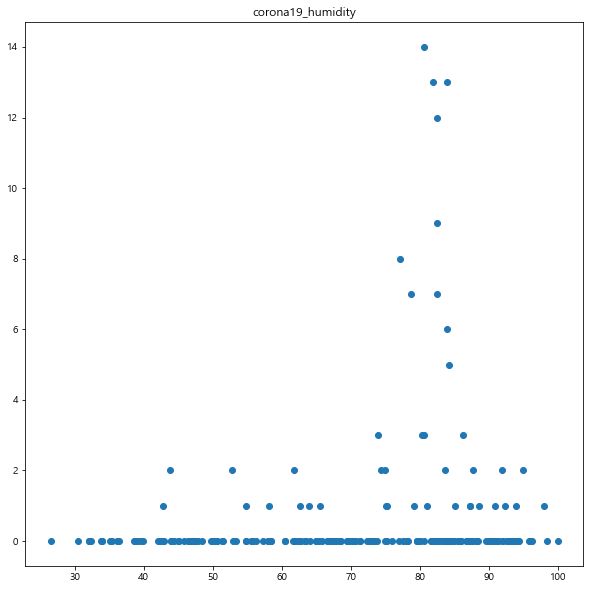

In [558]:
plt.figure(figsize=(10, 10))
plt.scatter(humidity['avg_relative_humidity'], confirmed['confirmed'])
plt.title('corona19_humidity')
plt.show()

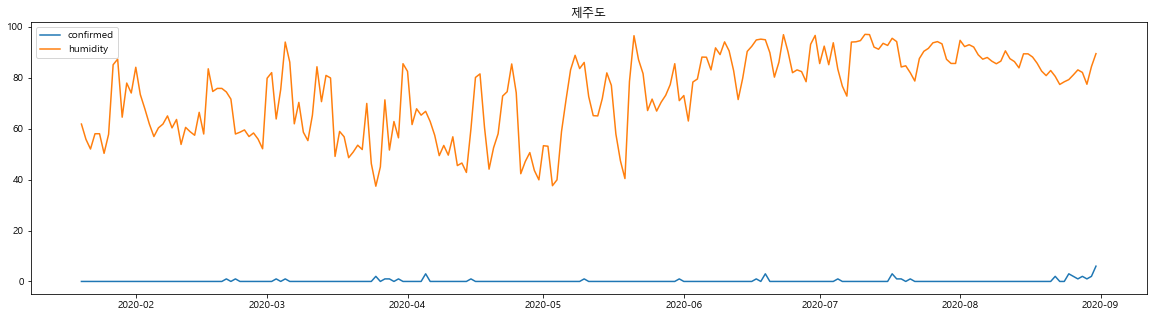

In [559]:
# 제주도 확진자 수
confirmed = confirmed_df[['date', 'confirmed']][confirmed_df['province'] == 'Jeju-do']
confirmed = confirmed.reset_index(drop=True) 

for i in range(len(confirmed)-1, 1, -1):
    confirmed['confirmed'][i] = confirmed['confirmed'][i] - confirmed['confirmed'][i-1]
    
confirmed['date'] = pd.to_datetime(confirmed['date'])

# 제주도 습도
humidity = weather_df[['date', 'avg_relative_humidity']][weather_df['province'] == 'Jeju-do']
humidity = humidity.reset_index(drop=True)

humidity2 = weather_df2[['date', 'avg_relative_humidity']][weather_df2['province'] == 'Jeju-do']
humidity2 = humidity2.reset_index(drop=True)

humidity['date'] = pd.to_datetime(humidity['date'])
humidity2['date'] = pd.to_datetime(humidity2['date'])

humidity = pd.concat([humidity, humidity2]) # 습도 데이터 두개 이어 붙이기
humidity = humidity.reset_index(drop=True)
humidity['date'] = humidity['date'] + pd.DateOffset(days = 5) # 5일씩 더해주는 과정
humidity = humidity.drop(humidity.index[0:14])
humidity = humidity.reset_index(drop=True)
humidity = humidity.drop(humidity.index[-1:-6:-1])

plt.figure(figsize=(20, 5))
plt.plot(confirmed['date'], confirmed['confirmed'], label='confirmed')
plt.plot(humidity['date'], humidity['avg_relative_humidity'], label = 'humidity')
plt.title("제주도")
plt.legend()
plt.show()

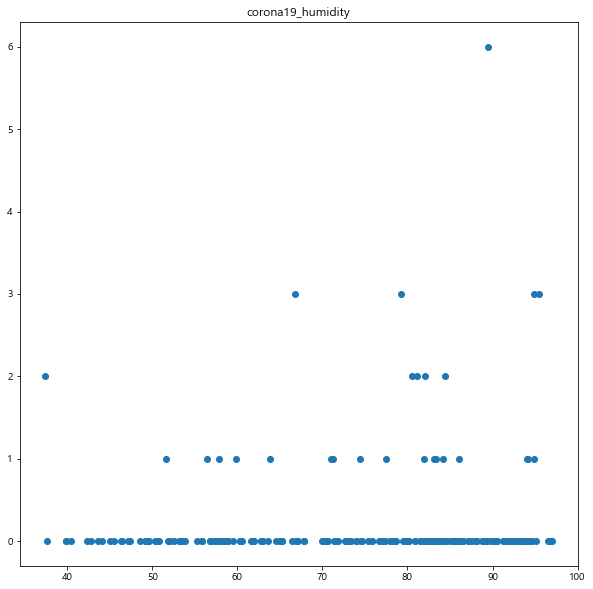

In [560]:
plt.figure(figsize=(10, 10))
plt.scatter(humidity['avg_relative_humidity'], confirmed['confirmed'])
plt.title('corona19_humidity')
plt.show()